## 第七章 爬虫

**学习爬虫可用于个人学习和研究数据,不可涉及违法使用.**

本章主要介绍Python中的爬虫模块：Scrapy的使用。数据分析离不开数据，有许多数据是网上公开的数据，比如每日的天气数据、空气指数数据等。本讲将介绍如何利用Python程序有效地抓取自己需要的数据。

本章通过对天气预报数据的抓取，介绍scrapy的使用

本章主要内容包括:

1、scrapy框架简介

2、scrapy创建抓取项目

3、scrapy对网页数据解析

4、scrapy应对反爬机制

5、scrapy存储数据

6、 scrapy 爬取图片数据


## 第一节 Scrapy 一览

Scrapy 是一个用来爬网站并且抽取结构化数据的应用框架。抽取的数据可以进一步地用于数据分析和数据挖掘。


首先通过一个简单的例子来认识Scrapy。

In [1]:
import scrapy

class MyFirstSpider(scrapy.Spider): #定义一个类，从scrapy.spider继承
    name = 'quotes' 
    start_urls = [
        'http://quotes.toscrape.com/tag/humor/',
    ] #开始的链接

    def parse(self, response): #定义parse解析网站，两个参数
        for quote in response.css('div.quote'): #从里面提取text,和author
            yield {
                'text': quote.css('span.text::text').get(),
                'author': quote.xpath('span/small/text()').get(),
            } #把内容压缩到内容

        next_page = response.css('li.next a::attr("href")').get() #处理下一个页面
        if next_page is not None:
            yield response.follow(next_page, self.parse)

scrapy runspider quotes_spider.py -o quotes.csv

当你运行命令 scrapy runspider quotes_spider.py 时，Scrapy 在这段代码里寻找“爬虫”的定义，然后开始爬取数据。

爬虫从start_urls里的链接（url）开始发送请求，并按照定义的方式抽取数据。

这里使用CSS Slector 和 xpath 来选取有用的字段。这段代码自动寻找并跟踪其他页面。


**安装 Scrapy**


pip install Scrapy

or

conda install -c conda-forge scrapy

接下来，我们简单从一下几个方面快速介绍scrapy

1. Creating a new Scrapy project
2. Writing a spider to crawl a site and extract data
3. Exporting the scraped data using the command line
4. Changing spider to recursively follow links
5. Using spider arguments


## Creating a new Scrapy project

记住下面三个常用命令（创建项目、运行项目）：

- scrapy startproject prjname     创建scrapy项目，命名为prjname（根据情况，自己取名）
- [cd prjname] scrapy genspider spidername example.com 创建名为spidername的爬虫 （根据情况，自己取名）
- scrapy crawl spidername   项目下的一个爬虫，其名字是 spidername（根据情况，自己取名）


在爬取数据之前，首先要设置一个新的Scrapy 项目：进入一个文件夹， 然后运行下面的code

In [2]:
pwd #查看当前工作路径,present working directory

'D:\\NLP'

In [3]:
import os
os.mkdir('./crawler') #在当前文件目录下，创建文件夹

In [9]:
ls -t #ls=list, 按照时间排序查看当前目录文件

 驱动器 D 中的卷是 Data
 卷的序列号是 A67C-A7B5

 D:\NLP\crawler 的目录


 D:\NLP\crawler 的目录


 D:\NLP\crawler 的目录


 D:\NLP\crawler 的目录



找不到文件


In [5]:
cd crawler/

D:\NLP\crawler


In [10]:
pwd

'D:\\NLP\\crawler'

In [11]:
!scrapy startproject tutorial #开始一个项目，名称叫tutorial  ## 在terminal 中不需要加"！""

##在mac没有问题，但是在windows有问题，解决办法如下图

Usage
=====
  scrapy startproject <project_name> [project_dir]

Create new project

Options
--help, -h              show this help message and exit

Global Options
--------------
--logfile=FILE          log file. if omitted stderr will be used
--loglevel=LEVEL, -L LEVEL
                        log level (default: DEBUG)
--nolog                 disable logging completely
--profile=FILE          write python cProfile stats to FILE
--pidfile=FILE          write process ID to FILE
--set=NAME=VALUE, -s NAME=VALUE
                        set/override setting (may be repeated)
--pdb                   enable pdb on failure


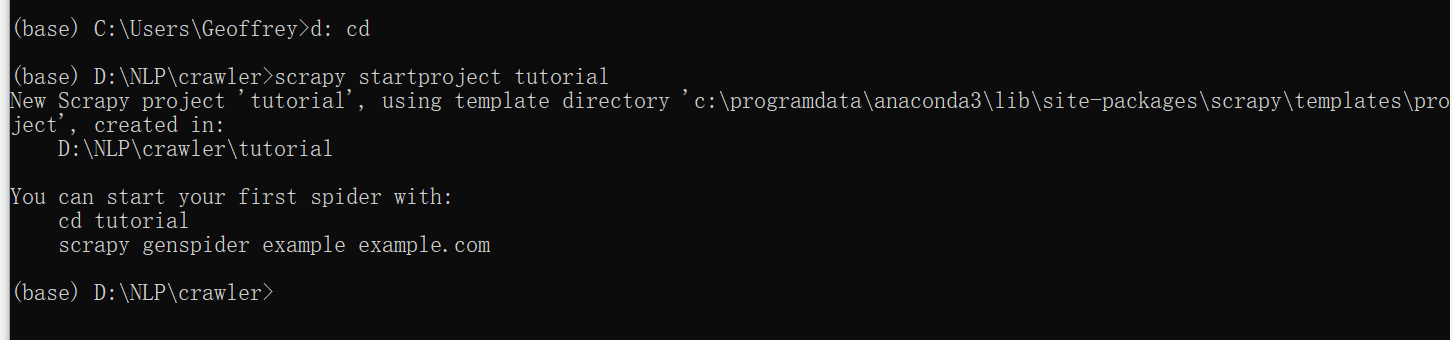
#解决的办法 在anaconda Prompt里面运行，直接运行 d: cd →

    这样，就会创建一个文件夹 tutorial ,其内容如下： 

tutorial/

    scrapy.cfg            # deploy configuration file

    tutorial/             # project's Python module, you'll import your code from here
        __init__.py

        items.py          # project items definition file

        middlewares.py    # project middlewares file

        pipelines.py      # project pipelines file

        settings.py       # project settings file

        spiders/          # a directory where you'll later put your spiders
            __init__.py

## Writing a spider to crawl a site and extract data

Spiders(爬虫)是用户定义的类，你可以使用它来爬取网页并抽取信息。

爬虫是由crapy.Spider继承而来。

你必须定义爬虫的初始网页（initial requests）

需要定义如何跟踪网页中的链接

以及如何从下载的网页抽取数据。

    在 tutorial/spiders 文件夹下面创建一个文件（我们的第一个spider）

创建一个python 文件quotes_spider.py，在里面键入程序：

In [7]:
import scrapy


class QuotesSpider(scrapy.Spider):  #从上面继承的
    name = "quotes"  #名字叫quotes

    def start_requests(self): #开始定义请求爬取的网页
        urls = [
            'http://quotes.toscrape.com/page/1/',
            'http://quotes.toscrape.com/page/2/',
        ]
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse) # Request两个参数，callback是对？

    def parse(self, response): #解析网页
        page = response.url.split("/")[-2]
        filename = 'quotes-%s.html' % page
        with open(filename, 'wb') as f:
            f.write(response.body)#存储 body是网页的内容
        self.log('Saved file %s' % filename)

从上面程序来看，我们的spider（QuotesSpider）继承其父类scrapy.Spider。这里用定义了一些属性和方法。

**name**: identifies the Spider. It must be unique within a project, that is, you can’t set the same name for different Spiders.

**start_requests()**: must return an iterable of Requests (you can return a list of requests or write a generator function)which the Spider will begin to crawl from. Subsequent requests will be generated successively from these initial requests.

**parse():** a method that will be called to handle the response downloaded for each of the requests made. The response parameter is an instance of TextResponse that holds the page content and has further helpful methods to handle it.

The parse() method usually parses the response, extracting the scraped data as dicts and also finding new URLs to follow and creating new requests (Request) from them.


## 运行我们的爬虫

在    scrapy.cfg    所在的文件夹下面，运行如下命令：


In [ ]:
scrapy crawl quotes

**star_request 方法的简写方式：**

把方法变成一个属性！

In [8]:
import scrapy


class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://quotes.toscrape.com/page/1/',
        'http://quotes.toscrape.com/page/2/',
    ]

    def parse(self, response):
        page = response.url.split("/")[-2]
        filename = 'quotes-%s.html' % page
        with open(filename, 'wb') as f:
            f.write(response.body)
           # name,开始的网页，怎么处理网页

**Extracting data**

scrapy 可以使用很多网页处理工具，如BeautifulSoap，但最主要的抽取工具是CSS和Xpath。

这里分别简介CSS 和 Xpath工具。

**CSS 选择器**

<html>
 <head>
  <base href='http://example.com/' />
  <title>Example website</title>
 </head>
 <body>
  <div id='images'>
   <a href='image1.html'>Name: My image 1 <br /><img src='image1_thumb.jpg' /></a>
   <a href='image2.html'>Name: My image 2 <br /><img src='image2_thumb.jpg' /></a>
   <a href='image3.html'>Name: My image 3 <br /><img src='image3_thumb.jpg' /></a>
   <a href='image4.html'>Name: My image 4 <br /><img src='image4_thumb.jpg' /></a>
   <a href='image5.html'>Name: My image 5 <br /><img src='image5_thumb.jpg' /></a>
  </div>
 </body>
</html>

以上面的一段html code为例，我们开看CSS选择器的使用。

In [ ]:
scrapy shell https://docs.scrapy.org/en/latest/_static/selectors-sample1.html #以scrapy开头 都是在terminal运行的，在ana promp里面运行

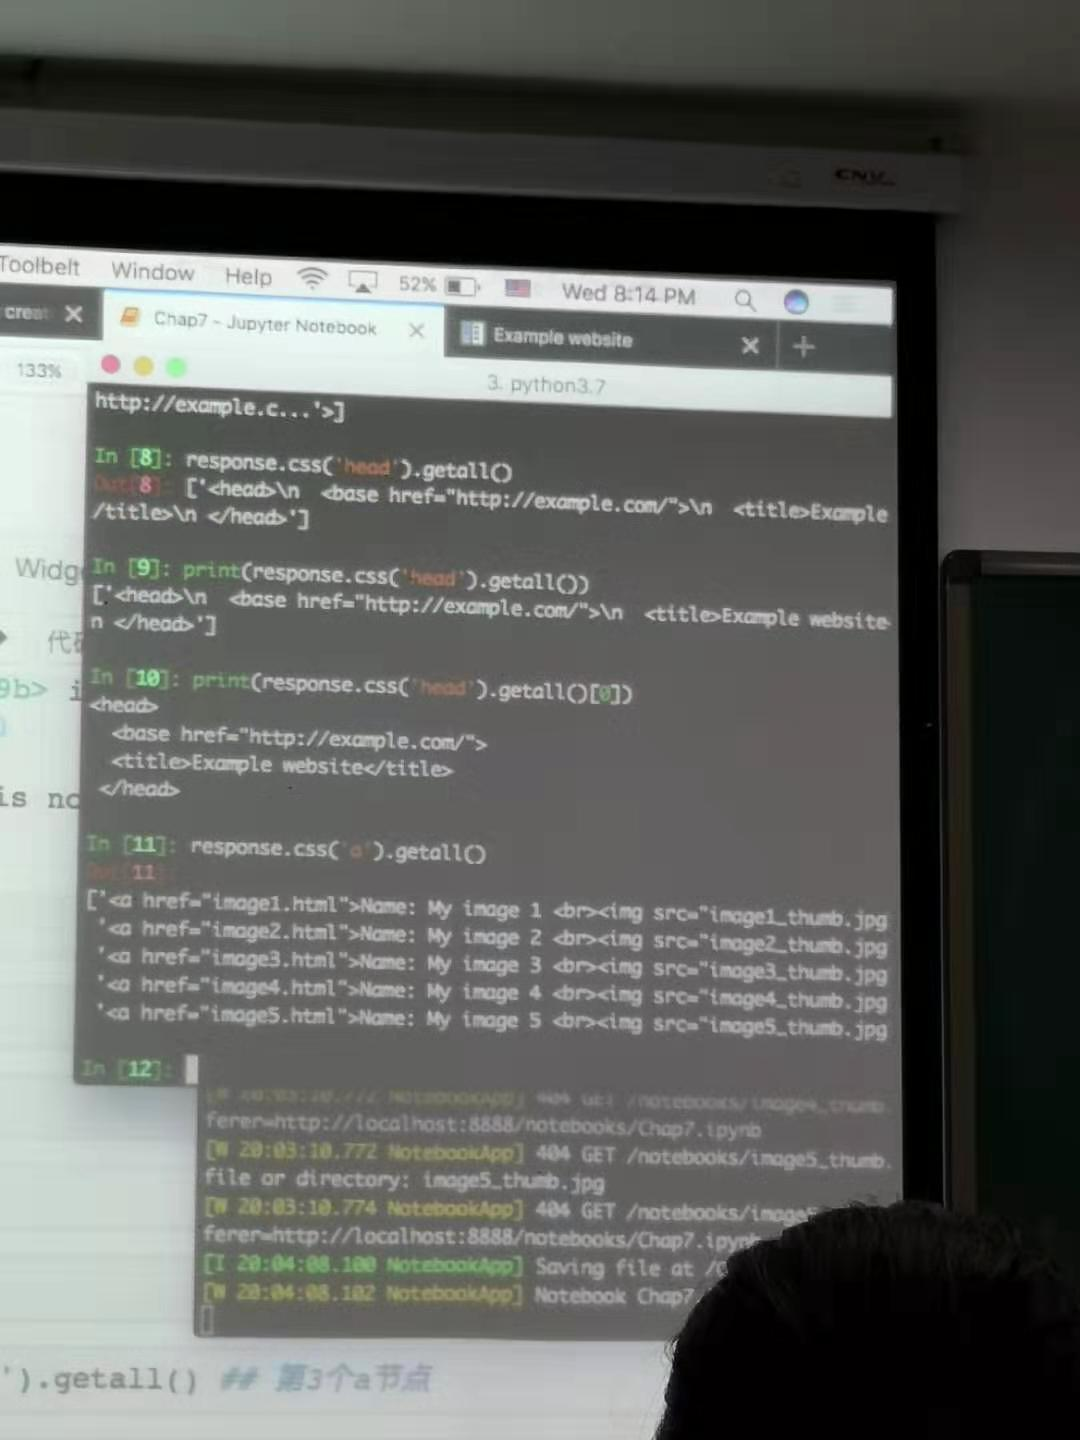


response.css('*')#可以看到所有的节点
response.css('#images')#在终端查找所有的图片
response.css('a[herf]')
response.css('a[herf^="image]"')精确定位到图片

In [ ]:
scrapy shell https://www.aqistudy.cn/historydata/daydata.php?city=%E4%B8%8A%E6%B5%B7&month=2014-01

- 选择节点(element) response.css('title').get()/.getall()
- 选择节点(element)的文本 response.css('title::text').get()/.getall()


response.css('title')  返回一个list，里面的元素是Selector类型的

In [9]:
response.css('html')

NameError: name 'response' is not defined

In [ ]:
response.css('head')

In [ ]:
response.css('title')

In [ ]:
response.css('body')

In [ ]:
response.css('div')

In [ ]:
response.css('a')

In [ ]:
response.css('a:nth-child(3)').getall() ## 第3个a节点

In [ ]:
response.css('a:nth-child(2n)').getall() ## 第2n个a节点

In [ ]:
response.css('*') ## 返回所有的节点

In [ ]:
response.css('#images') ## 返回id 为images的节点

In [ ]:
response.css('div a').getall() ## div 下的所有a节点

In [ ]:
response.css('a[href="image1.html"]').getall() ## 选取href属性为image1.html 的 a 节点

In [ ]:
response.css('a[href*="image"]').getall()## 选取href属性包含image 的 a 节点

In [ ]:
response.css('a[href^="image"]').getall()## 选取href属性以image开头 的 a 节点

In [ ]:
response.css('a[href$="html"]').getall()## 选取href属性以html结尾 的 a 节点

In [10]:
<div class="quote">
    <span class="text">“The world as we have created it is a process of our
    thinking. It cannot be changed without changing our thinking.”</span>
    <span>
        by <small class="author">Albert Einstein</small>
        <a href="/author/Albert-Einstein">(about)</a>
    </span>
    <div class="tags">
        Tags:
        <a class="tag" href="/tag/change/page/1/">change</a>
        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
        <a class="tag" href="/tag/thinking/page/1/">thinking</a>
        <a class="tag" href="/tag/world/page/1/">world</a>
    </div>
</div>

SyntaxError: invalid syntax (<ipython-input-10-1184f07fbc68>, line 1)

In [12]:
html  = r'''
<div class="quote">
    <span class="text">“The world as we have created it is a process of our
    thinking. It cannot be changed without changing our thinking.”</span>
    <span>
        by <small class="author">Albert Einstein</small>
        <a href="/author/Albert-Einstein">(about)</a>
    </span>
    <div class="tags">
        Tags:
        <a class="tag" href="/tag/change/page/1/">change</a>
        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
        <a class="tag" href="/tag/thinking/page/1/">thinking</a>
        <a class="tag" href="/tag/world/page/1/">world</a>
    </div>
</div>
'''

In [13]:
html

'\n<div class="quote">\n    <span class="text">“The world as we have created it is a process of our\n    thinking. It cannot be changed without changing our thinking.”</span>\n    <span>\n        by <small class="author">Albert Einstein</small>\n        <a href="/author/Albert-Einstein">(about)</a>\n    </span>\n    <div class="tags">\n        Tags:\n        <a class="tag" href="/tag/change/page/1/">change</a>\n        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>\n        <a class="tag" href="/tag/thinking/page/1/">thinking</a>\n        <a class="tag" href="/tag/world/page/1/">world</a>\n    </div>\n</div>\n'

In [14]:
print(html)


<div class="quote">
    <span class="text">“The world as we have created it is a process of our
    thinking. It cannot be changed without changing our thinking.”</span>
    <span>
        by <small class="author">Albert Einstein</small>
        <a href="/author/Albert-Einstein">(about)</a>
    </span>
    <div class="tags">
        Tags:
        <a class="tag" href="/tag/change/page/1/">change</a>
        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
        <a class="tag" href="/tag/thinking/page/1/">thinking</a>
        <a class="tag" href="/tag/world/page/1/">world</a>
    </div>
</div>



In [15]:
from scrapy.selector import Selector

In [16]:
response = Selector(text=html)

In [17]:
response.css('div.quote').getall() #class 为quote的div节点

['<div class="quote">\n    <span class="text">“The world as we have created it is a process of our\n    thinking. It cannot be changed without changing our thinking.”</span>\n    <span>\n        by <small class="author">Albert Einstein</small>\n        <a href="/author/Albert-Einstein">(about)</a>\n    </span>\n    <div class="tags">\n        Tags:\n        <a class="tag" href="/tag/change/page/1/">change</a>\n        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>\n        <a class="tag" href="/tag/thinking/page/1/">thinking</a>\n        <a class="tag" href="/tag/world/page/1/">world</a>\n    </div>\n</div>']

In [18]:
len(response.css('div.quote').getall()) #.代表是clss=

1

In [19]:
quotes = response.css('div.quote') #class 为quote的div节点

In [20]:
quotes.css('small.author::text').getall() #取出里面文本

['Albert Einstein']

In [25]:
#response.css('small.author').getall()

['<small class="author">Albert Einstein</small>']

In [26]:
#response.css('div.tags').getall()

In [28]:
#response.css('div.tags::text').getall() #以text文档返回

['\n        Tags:\n        ',
 '\n        ',
 '\n        ',
 '\n        ',
 '\n    ']

In [23]:
#len(response.css('div.tags').getall())

1

In [24]:
#quotes=response.css('div.quote')

In [19]:
text = quotes.css("span.text::text").get() #找出所说名言

In [20]:
text

'“The world as we have created it is a process of our\n    thinking. It cannot be changed without changing our thinking.”'

In [21]:
tags = quotes.css("div.tags a.tag::text").getall()

In [22]:
tags

['change', 'deep-thoughts', 'thinking', 'world']

In [23]:
for quote in response.css("div.quote"):
    text = quote.css("span.text::text").get()
    author = quote.css("small.author::text").get()
    tags = quote.css("div.tags a.tag::text").getall()

print(dict(text=text, author=author, tags=tags))

{'text': '“The world as we have created it is a process of our\n    thinking. It cannot be changed without changing our thinking.”', 'author': 'Albert Einstein', 'tags': ['change', 'deep-thoughts', 'thinking', 'world']}


**Xpath**

在 XPath 中，有七种类型的节点：元素、属性、文本、命名空间、处理指令、注释以及文档节点（或称为根节点）

我们看到的html（xml）文档，被看成是节点树

树的根被称为跟节点，或文档节点。



核心用法：Xpath 视response （html的内容）为一个路径（path，文件夹结构），

因此起引用过程非常像寻找文件的过程

以／开头的路径，是指绝对路径

以 // 开头的路径，是搜索路径：即只要系统中存在该元素（节点），就可以把它找出来。

In [24]:
print(html)


<div class="quote">
    <span class="text">“The world as we have created it is a process of our
    thinking. It cannot be changed without changing our thinking.”</span>
    <span>
        by <small class="author">Albert Einstein</small>
        <a href="/author/Albert-Einstein">(about)</a>
    </span>
    <div class="tags">
        Tags:
        <a class="tag" href="/tag/change/page/1/">change</a>
        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
        <a class="tag" href="/tag/thinking/page/1/">thinking</a>
        <a class="tag" href="/tag/world/page/1/">world</a>
    </div>
</div>



## / 的用法

    / Document Root文档根.

    /* 选择文档根下面的所有元素节点，即根节点（XML文档只有一个根节点）



In [25]:
response.xpath('/*')

[<Selector xpath='/*' data='<html><body><div class="quote">\n    <...'>]

In [26]:
print(response.xpath('/*').getall()[0])

<html><body><div class="quote">
    <span class="text">“The world as we have created it is a process of our
    thinking. It cannot be changed without changing our thinking.”</span>
    <span>
        by <small class="author">Albert Einstein</small>
        <a href="/author/Albert-Einstein">(about)</a>
    </span>
    <div class="tags">
        Tags:
        <a class="tag" href="/tag/change/page/1/">change</a>
        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
        <a class="tag" href="/tag/thinking/page/1/">thinking</a>
        <a class="tag" href="/tag/world/page/1/">world</a>
    </div>
</div></body></html>


In [27]:
response.xpath('/html/body/div')

[<Selector xpath='/html/body/div' data='<div class="quote">\n    <span class="...'>]

## //的用法

In [28]:
response.xpath('//div') #相对路径，//找到所有div节点

[<Selector xpath='//div' data='<div class="quote">\n    <span class="...'>,
 <Selector xpath='//div' data='<div class="tags">\n        Tags:\n    ...'>]

## 匹配

\* -- **元素**节点

@* --**属性**节点


In [29]:
response.xpath('/html/body/div/*')

[<Selector xpath='/html/body/div/*' data='<span class="text">“The world as we h...'>,
 <Selector xpath='/html/body/div/*' data='<span>\n        by <small class="autho...'>,
 <Selector xpath='/html/body/div/*' data='<div class="tags">\n        Tags:\n    ...'>]

In [30]:
response.xpath('/html/body/div/@*')

[<Selector xpath='/html/body/div/@*' data='quote'>]

In [31]:
response.xpath('/html/body/div/*[1]')

[<Selector xpath='/html/body/div/*[1]' data='<span class="text">“The world as we h...'>]

In [32]:
response.xpath('/html/body/div/*[2]')

[<Selector xpath='/html/body/div/*[2]' data='<span>\n        by <small class="autho...'>]

In [33]:
response.xpath('/html/body/div/*')[1] ## 注意两者的区别

<Selector xpath='/html/body/div/*' data='<span>\n        by <small class="autho...'>

前面主要考查了元素节点，若查找属性节点用@

In [34]:
response.xpath('/html/body/div/*')

[<Selector xpath='/html/body/div/*' data='<span class="text">“The world as we h...'>,
 <Selector xpath='/html/body/div/*' data='<span>\n        by <small class="autho...'>,
 <Selector xpath='/html/body/div/*' data='<div class="tags">\n        Tags:\n    ...'>]

In [35]:
response.xpath('//div')

[<Selector xpath='//div' data='<div class="quote">\n    <span class="...'>,
 <Selector xpath='//div' data='<div class="tags">\n        Tags:\n    ...'>]

In [36]:
response.xpath('//span')

[<Selector xpath='//span' data='<span class="text">“The world as we h...'>,
 <Selector xpath='//span' data='<span>\n        by <small class="autho...'>]

In [37]:
response.xpath('//span[@class]')#只要span有属性就能找出

[<Selector xpath='//span[@class]' data='<span class="text">“The world as we h...'>]

In [38]:
response.xpath('//span[@*]')

[<Selector xpath='//span[@*]' data='<span class="text">“The world as we h...'>]

In [39]:
response.xpath('//@*') #找出所有属性的节点

[<Selector xpath='//@*' data='quote'>,
 <Selector xpath='//@*' data='text'>,
 <Selector xpath='//@*' data='author'>,
 <Selector xpath='//@*' data='/author/Albert-Einstein'>,
 <Selector xpath='//@*' data='tags'>,
 <Selector xpath='//@*' data='tag'>,
 <Selector xpath='//@*' data='/tag/change/page/1/'>,
 <Selector xpath='//@*' data='tag'>,
 <Selector xpath='//@*' data='/tag/deep-thoughts/page/1/'>,
 <Selector xpath='//@*' data='tag'>,
 <Selector xpath='//@*' data='/tag/thinking/page/1/'>,
 <Selector xpath='//@*' data='tag'>,
 <Selector xpath='//@*' data='/tag/world/page/1/'>]

In [40]:
response.xpath('//*[@*]')

[<Selector xpath='//*[@*]' data='<div class="quote">\n    <span class="...'>,
 <Selector xpath='//*[@*]' data='<span class="text">“The world as we h...'>,
 <Selector xpath='//*[@*]' data='<small class="author">Albert Einstein...'>,
 <Selector xpath='//*[@*]' data='<a href="/author/Albert-Einstein">(ab...'>,
 <Selector xpath='//*[@*]' data='<div class="tags">\n        Tags:\n    ...'>,
 <Selector xpath='//*[@*]' data='<a class="tag" href="/tag/change/page...'>,
 <Selector xpath='//*[@*]' data='<a class="tag" href="/tag/deep-though...'>,
 <Selector xpath='//*[@*]' data='<a class="tag" href="/tag/thinking/pa...'>,
 <Selector xpath='//*[@*]' data='<a class="tag" href="/tag/world/page/...'>]

In [29]:
response.xpath('//*[@*]').getall()

['<div class="quote">\n    <span class="text">“The world as we have created it is a process of our\n    thinking. It cannot be changed without changing our thinking.”</span>\n    <span>\n        by <small class="author">Albert Einstein</small>\n        <a href="/author/Albert-Einstein">(about)</a>\n    </span>\n    <div class="tags">\n        Tags:\n        <a class="tag" href="/tag/change/page/1/">change</a>\n        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>\n        <a class="tag" href="/tag/thinking/page/1/">thinking</a>\n        <a class="tag" href="/tag/world/page/1/">world</a>\n    </div>\n</div>',
 '<span class="text">“The world as we have created it is a process of our\n    thinking. It cannot be changed without changing our thinking.”</span>',
 '<small class="author">Albert Einstein</small>',
 '<a href="/author/Albert-Einstein">(about)</a>',
 '<div class="tags">\n        Tags:\n        <a class="tag" href="/tag/change/page/1/">change</a>\n        <a cl

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [41]:
response.xpath('//a[@href]') #找到a节点含有href属性

[<Selector xpath='//a[@href]' data='<a href="/author/Albert-Einstein">(ab...'>,
 <Selector xpath='//a[@href]' data='<a class="tag" href="/tag/change/page...'>,
 <Selector xpath='//a[@href]' data='<a class="tag" href="/tag/deep-though...'>,
 <Selector xpath='//a[@href]' data='<a class="tag" href="/tag/thinking/pa...'>,
 <Selector xpath='//a[@href]' data='<a class="tag" href="/tag/world/page/...'>]

In [42]:
response.xpath('//a[@href="/tag/change/page/1/"]')#精确定位某一个href

[<Selector xpath='//a[@href="/tag/change/page/1/"]' data='<a class="tag" href="/tag/change/page...'>]

In [43]:
print(response.xpath('/*').getall()[0])

<html><body><div class="quote">
    <span class="text">“The world as we have created it is a process of our
    thinking. It cannot be changed without changing our thinking.”</span>
    <span>
        by <small class="author">Albert Einstein</small>
        <a href="/author/Albert-Einstein">(about)</a>
    </span>
    <div class="tags">
        Tags:
        <a class="tag" href="/tag/change/page/1/">change</a>
        <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
        <a class="tag" href="/tag/thinking/page/1/">thinking</a>
        <a class="tag" href="/tag/world/page/1/">world</a>
    </div>
</div></body></html>


In [44]:
response.xpath('/html/body/div/span[@*]')

[<Selector xpath='/html/body/div/span[@*]' data='<span class="text">“The world as we h...'>]

In [45]:
response.xpath('//div|//span')

[<Selector xpath='//div|//span' data='<div class="quote">\n    <span class="...'>,
 <Selector xpath='//div|//span' data='<span class="text">“The world as we h...'>,
 <Selector xpath='//div|//span' data='<span>\n        by <small class="autho...'>,
 <Selector xpath='//div|//span' data='<div class="tags">\n        Tags:\n    ...'>]

In [46]:
response.xpath('//span')

[<Selector xpath='//span' data='<span class="text">“The world as we h...'>,
 <Selector xpath='//span' data='<span>\n        by <small class="autho...'>]

In [30]:
response.xpath('//span/text()')

[<Selector xpath='//span/text()' data='“The world as we have created it is a...'>,
 <Selector xpath='//span/text()' data='\n        by '>,
 <Selector xpath='//span/text()' data='\n        '>,
 <Selector xpath='//span/text()' data='\n    '>]

In [31]:
response.xpath('//span/text()').getall()

['“The world as we have created it is a process of our\n    thinking. It cannot be changed without changing our thinking.”',
 '\n        by ',
 '\n        ',
 '\n    ']

In [48]:
response.xpath('//span/attribute::class')

[<Selector xpath='//span/attribute::class' data='text'>]

In [49]:
response.xpath('//span[@class]/@class')##和上面等价

[<Selector xpath='//span[@class]/@class' data='text'>]

In [32]:
response.xpath('//span[@class]/@class').getall()##和上面等价

['text']

接下来几节，将通过一个实例，来阐述爬虫项目的编写过程

参考： https://www.jianshu.com/p/169b62a8a269

## 第二节 scrapy创建抓取项目

scrapy startproject weather

cd weather

scrapy genspider weatherspider example.com

## 第三节 scrapy对网页数据解析

首先分析网页

https://lishi.tianqi.com/beijing/201908.html

可以看到，url是一个通用主站[https://lishi.tianqi.com/] + [城市] + [月份.html] 构成的。

这样的网址构成很简单，只需定义好城市和月份，即可直达网址，然后爬取数据即可。

其实，网址也可以从[https://lishi.tianqi.com/] + [城市]+[/index.html]中爬取。

有了前面的准备，我们开始准备解析网页数据。

从网页看到，天气信息主要包含如下几个方面的信息：

    日期
    最高气温
    最低气温
    天气
    风向
    风力
 再加上城市信息，我们构造如下的结构，写在 items.py 文件中：
 
 


In [50]:
# -*- coding: utf-8 -*-

# Define here the models for your scraped items
#
# See documentation in:
# https://docs.scrapy.org/en/latest/topics/items.html

import scrapy


class WeatherItem(scrapy.Item):
    # define the fields for your item here like:
    # name = scrapy.Field()
    #pass

    # 城市
    city = scrapy.Field()
    # 日期
    date = scrapy.Field()
    # 最高气温
    tempHigh = scrapy.Field()
    # 最低气温
    tempLow  = scrapy.Field()
    # 天气
    weather = scrapy.Field()
    # 风向
    windDirec = scrapy.Field()
    # 风力
    windLevel = scrapy.Field()
    # 数据源
    source = scrapy.Field()


接下来，开始到我们程序的主体部分：spider的编写。

我们编写在weatherspider.py中。

回顾前面的简单例子，一个spider，主要是定义了两个操作。

1. 从哪里开始爬取数据
2. 处理完初始网页之后，还要干啥

这两件事情定义好了，我们就定义好了spider！ So easy！

So far so good！

In [51]:
# -*- coding: utf-8 -*-
import scrapy
from items import WeatherItem
import pandas as pd

class WeatherspiderSpider(scrapy.Spider):
    name = 'weatherspider'
    #allowed_domains = ['example.com']
    base_url = 'https://lishi.tianqi.com/'
    start_urls = [base_url]
    cities  = ['beijing','shanghai','tianjin','chongqin','zhengzhou']
    Dates = pd.date_range(start='1/2011',end='9/2019', freq='M')

    def parse(self, response):
        URLs = []
        for city in self.cities:
            for date in self.Dates:
                url = self.base_url + city+'/'+date.strftime("%Y%m")+'.html'
                URLs.append(url)
        for url in URLs:
            yield scrapy.Request(url,callback = self.parse_data,meta={"city":city,'source':url})

    def parse_data(self,response):
        node_list = response.xpath('//div[@class="tqtongji2"]/ul')
        n0 = node_list.pop(0)

        for node in node_list:
            item = WeatherItem()
            item['city'] = response.meta['city']
            item['date'] = node.xpath('./li[1]/text()').extract_first()
            item['tempHigh'] = node.xpath('./li[2]/text()').extract_first()
            item['tempLow'] = node.xpath('./li[3]//text()').extract_first()
            item['weather'] = node.xpath('./li[4]/text()').extract_first()
            item['windDirec'] = node.xpath('./li[5]/text()').extract_first()
            item['windLevel'] = node.xpath('./li[6]/text()').extract_first()
            item['source'] = response.meta['source']
            yield item


ModuleNotFoundError: No module named 'items'

## 第四节 scrapy应对反爬机制

scrapy shell "http://lishi.tianqi.com/guangzhou/201101.html" 

scrapy shell -s USER_AGENT='Mozilla/5.0'"http://lishi.tianqi.com/guangzhou/201101.html" 

在运行爬虫代码时，也要设置USER_AGENT，打开settings.py,找到注释掉的USER_AGENT

In [52]:
# Crawl responsibly by identifying yourself (and your website) on the user-agent
#USER_AGENT = 'weather (+http://www.yourdomain.com)'
USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:69.0) Gecko/20100101 Firefox/69.0'

这样是写死了USER_AGENT,为了更好地应对发爬机制，可以考虑随机使用一些USER_AGENT进行伪装：

修改settings文件:

In [ ]:
pip install scrapy_fake_useragent

In [53]:
DOWNLOADER_MIDDLEWARES = {
'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware':None,# 关闭默认方法
'scrapy_fake_useragent.middleware.RandomUserAgentMiddleware':400,# 开启
}

还有其他方法，可以设置不同的agent，请参阅：https://www.cnblogs.com/l520/p/10246528.html

## 第五节 scrapy存储数据

一些未涉及的内容：
- 分布式爬虫
- 动态网站爬取
- 通过代理应对反爬虫机制

## 第六节 对爬取的数据进行分析

In [55]:
import pandas as pd
data = pd.read_csv('./weather2.csv')

FileNotFoundError: [Errno 2] File b'./weather2.csv' does not exist: b'./weather2.csv'

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data_bj = data[data.city == 'beijing']

In [ ]:
data_bj.shape

In [ ]:
data_bj_sorted = data_bj.sort_values(by='date')

In [ ]:
data_bj_sorted.head()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
xs = [datetime.datetime.strptime(d, '%Y-%m-%d').date() for d in data_bj_sorted.date]
plt.plot(xs,np.array(data_bj_sorted.tempHigh),'.')
plt.show()

## 第七节 抓取并存储图片

In [2]:
import urllib


In [34]:
picurl = 'http://preview.qiantucdn.com/58pic/35/42/49/94Z58PICF04ZD58PICHub0YSe_PIC2018.jpg!qt324new_nowater'

In [35]:
localpath = './example/pic/toy.jpg'

In [36]:
urllib.request.urlretrieve(picurl,filename=localpath)

FileNotFoundError: [Errno 2] No such file or directory: './example/pic/toy.jpg'

In [39]:
os.path.isdir(localpath)

True

In [38]:
if not os.path.isdir('./example/pic/'):
    os.makedirs('./example/pic/')

In [41]:
urllib.request.urlretrieve(picurl,filename=localpath)

('./example/pic/toy.jpg', <http.client.HTTPMessage at 0x1085a8ac8>)

In [25]:
pwd

'/Users/jinzhu/Documents/Books/BookPython'

In [46]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"


urllib.request.urlretrieve(url,filename=localpath+ 'example.txt')

('./example/pic/toy.jpgexample.txt', <http.client.HTTPMessage at 0x1085a3dd8>)

实现思路及实现步骤：
1. 对爬取的网页进行分析，总结出爬取内容的表达式，总结出网页之间的联系，实现网页的自动跳转
2. 创建爬虫项目
3. 编写对应的items.py, pipelines.py, settings.py
4. 编写爬虫文件，实现**爬取当前列表页面的所有图片**


首先分析入口网站：http://www.58pic.com/tb

选择一个图片，比如万圣节海报，其对应的图片网址为： www.58pic.com/newpic/35424994.html

再看一个网址：//preview.qiantucdn.com/58pic/35/42/49/94Z58PICF04ZD58PICHub0YSe_PIC2018.jpg!qt324new_nowater
为其缩略图对应的网址！

**1. 创建项目**

In [ ]:
scrapy startproject pic_download

cd pic_download


In [ ]:
scrapy genspider pic example.com

**2. 编写items.py**

In [ ]:
# -*- coding: utf-8 -*-

# Define here the models for your scraped items
#
# See documentation in:
# https://docs.scrapy.org/en/latest/topics/items.html

import scrapy


class PicDownloadItem(scrapy.Item):
    # define the fields for your item here like:
    # name = scrapy.Field()

    # 建立picurl 存储图片的网址
    picurl = scrapy.Field()

    ## 建立picid存储图片网址中的文件名，用于构造本地文件名
    picid = scapy.Field()

**3. 编写pipelines.py** 用于告诉spider 怎样存储图片

In [26]:
class PicDownloadPipeline(object):
    def process_item(self, item, spider):
        #一个图片列表页中有多张图片时，通过for循环依次将图片存储到本地
        for i in range(0,len(item['picurl'])):
            thispic = item['picurl'][i]
            localpath = "./my_downloads/pic/" + item['picid'][i] +'.jpg'
            urllib.request.urlretrieve(thispic,filename=localpath)
        return item

**4. 配置 settings**

In [27]:
# Configure item pipelines
# See https://docs.scrapy.org/en/latest/topics/item-pipeline.html
ITEM_PIPELINES = {
    'pic_download.pipelines.PicDownloadPipeline': 300,
}


**4. 编写spider**

In [ ]:
scrapy shell 'https://www.58pic.com/piccate/3-0-0.html'

**5. 运行 spider**

In [ ]:
scrapy crawl pic

## 作业
1. 爬取雾霾数据
2. 研究雾霾在最近5年的变化趋势
3. 研究雾霾和风向、风力的关系